# Data Science Tutorial - Twitch Streaming

**Vijay Balakrishnan**

**Introduction:**

Welcome! In this tutorial, we will follow the steps of parsing and managing a dataset, exploratory data analysis, machine learning, and finally, drawing conclusions based on our ultimate analysis. The data we will be using is related to the performance of the top 1000 streamers on Twitch from Aug 2019-Aug 2020.

Twitch is a live streaming service mainly focused on video game live streaming. Following the growth of the gaming industry, Twitch streaming has grown exponentially over the past several years, so I thought it would be interesting to use this dataset for our tutorial and see what conclusions we can draw about top streamers and their performance. How do followers, viewers, and watchtime relate to one another? Does an established high follow count account for larger continued growth? What is a strong indicator of streaming success? The following tutorial plans to explore some of these questions, and also offer avenues for further exploration.

**About data/Links:**

The data used in this tutorial was pulled from Kaggle: https://www.kaggle.com/aayushmishra1512/twitchdata/discussion/234179

Credit goes to Aayush Mitra for scraping and publishing the data.

Here are some relevant links discussing Twitch's growth (as well as competitor Facebook Games) for those interested:
https://www.dexerto.com/entertainment/viewership-stats-show-massive-growth-of-twitch-in-2021-so-far-1550844

https://www.digitalmusicnews.com/2021/01/13/twitch-growth-2020/

**Set Up**

First, let's import the necessary Python packages required for this tutorial.

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

**Load In The Data**

Next, we will load our data, currently contained in a CSV file, into a pandas DataFrame.

In [349]:
#read in data
df = pd.read_csv("twitchdata-update.csv")

Let's check the first few rows of our DataFrame to make sure everything looks okay.

In [350]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


**Tidy/Manage Data**

First, let's drop the columns that we're not interested in.

In [351]:
df = df.drop(columns=['Partnered','Mature','Language'])

Second, let's rename some of the wordier column names.

In [352]:
df = df.rename(columns={"Channel":"channel", "Watch time(Minutes)":"watch_time", \
          "Stream time(minutes)":"stream_time", "Peak viewers":"peak_viewers", "Average viewers":"avg_viewers", \
         "Followers":"followers", "Followers gained":"new_followers", "Views gained":"new_views"})

Because we want to compare amount of followers gained in the past year (new_followers) to the previously established follower count, lets create a new column, existing_followers based on followers and new_followers.

In [353]:
df.insert(7, 'existing_followers', df['followers'] - df['new_followers'])
df.head()

,channel,watch_time,stream_time,peak_viewers,avg_viewers,followers,new_followers,existing_followers,new_views
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,1511488,93036735
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,3939979,89705964
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,743856,102611607
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,3240864,106546942
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,6870479,78998587


Finally, it may be helpful to include columns ranking each streamer by their initial follow count versus their follower growth over the past year.

In [354]:
df['follower_rank'] = df['existing_followers'].rank(ascending=False)
df['new_follower_rank'] = df['new_followers'].rank(ascending=False)
df.head()

,channel,watch_time,stream_time,peak_viewers,avg_viewers,followers,new_followers,existing_followers,new_views,follower_rank,new_follower_rank
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,1511488,93036735,41.0,9.0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,3939979,89705964,7.0,18.0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,743856,102611607,115.0,32.0
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,3240864,106546942,11.0,54.0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,6870479,78998587,2.0,6.0


**Exploratory Data Analysis/Visualization:**

Logically, we know that many of these variables (watchtime, viewers, followers) should be related to another. Let's compare individual columns to see how certain features relate to one another, starting with follower count and watch time.

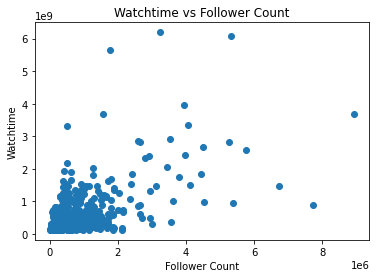

In [355]:
plt.scatter(df['followers'], df['watch_time'])
plt.xlabel("Follower Count")
plt.ylabel("Watchtime")
plt.title("Watchtime vs Follower Count")
plt.show()

This plot shows a pretty interesting relationship. It's seems as if there is a large cluster of streamers between 0-2 million followers who have a total watchtime under 2 billion minutes, and then a small group of other streamers above 2 million followers who have higher watchtimes. Interestingly, the 2-3 streamers with the highest watchtimes are not the streamers with the highest follower counts. This may due to them spending a longer time on the Twitch platform but growing at a slower rate, thus racking up a high watchtime.

Let's move on to look at new followers in the past year (Aug 2019-Aug 2020) versus existing followers beforehand.

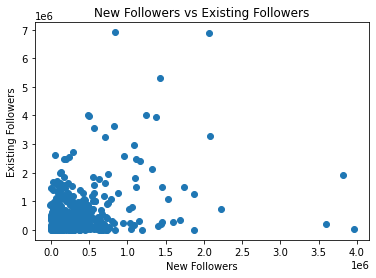

In [356]:
plt.scatter(df['new_followers'], df['existing_followers'])
plt.xlabel("New Followers")
plt.ylabel("Existing Followers")
plt.title("New Followers vs Existing Followers")
plt.show()

This plot looks pretty similar to the previous plot - it seems as if several streamers under 2 million existing followers followed a similar growth rate of 0-1 million followers the following year. However, we can also see that many streamers with a higher number of existing followers either met or only slightly exceeded that growth rate, falling under 1.5 million new followers. Finally, there were a few outliers - 3 streamers under 2 million existing followers grew massively in follow count, gaining 3.5-4 million followers the following year.

To decide what relationship we may want to further explore, let's look at the correlation of each column via a correlation matrix. We can do so using the Seaborn library.

Remember, correlation helps us measure the strength of the linear relationship between two variables. Keep in mind that correlation does not indicate causation: while the two variables may be closely associated, we cannot prove a cause and effect relationship, where one is dependent on the other. It is important to consider whether an auxiliary variable may eb the true cause of the correlation. Look more into this topic here: https://amplitude.com/blog/causation-correlation

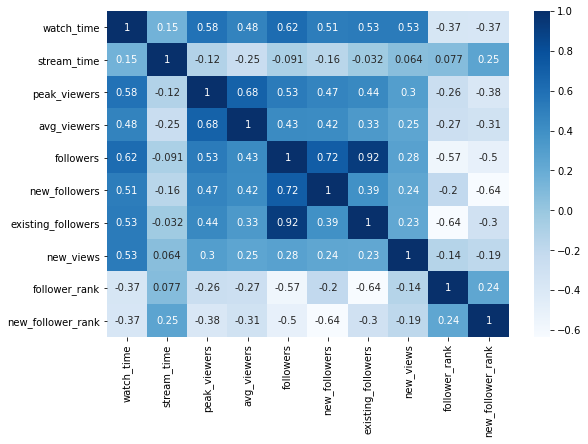

In [357]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

Based on the above heatmap, we can see that there is a relatively strong relationship between watchtime and followers (0.62), but that existing followers and new followers do not have a strong linear relationship (0.39). It is also worth noting that there is a weak, yet visible relationship between peak_viewers and followers (0.53).

Initially, I was surprised to see that these variables do not have a strong correlation. However, after reflection, I realized that many of these streamers may have either only begun their Twitch channels within Aug 2019-Aug 2020, or experienced almost all of their growth during that time. This would render a comparison between new and existing followers irrelevant.

Ideally, we would try and analyze growth based on a quarterly rather than yearly period, but we don't have access to that information within this dataset. However, what would happen if we eliminated the streamers who had an existing following under, for example, 250,000 followers from the dataset, and then tried to see if there was a linear relationship between new followers and existing followers for the remaning streamers? Let's see.


In [358]:
df.shape

(1000, 11)

In [359]:
df_filtered = df[df['existing_followers'] >= 250000]
df_filtered.shape

(395, 11)

This cleared out over half the streamers within our dataset. Let's see if we notice any changes within the correlation heatmap.

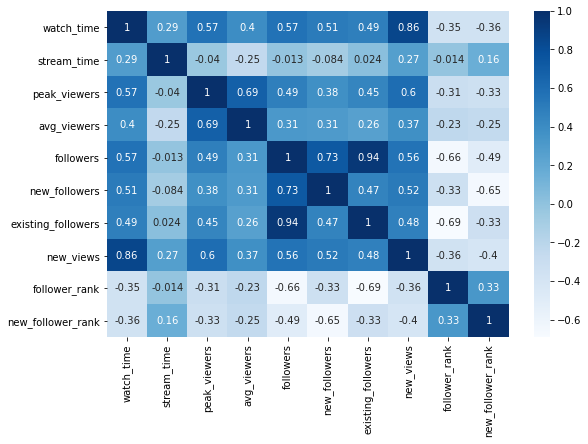

In [360]:
plt.figure(figsize=(9,6))
sns.heatmap(df_filtered.corr(), annot=True, cmap='Blues')
plt.show()

The correlation increased from 0.39 to 0.47, which is still not a strong relationship.

While we may have to consider other factors, and 250,000 is by no means the perfect cutoff for required number of existing followers to measure growth over a year, our findings may indicate that follower growth does not necessarily follow a linear model, but can perhaps be modeled/predicted exponentially.

**Machine Learning Algorithm - Linear Regression**

In the last section, we found that watchtime was the variable most closely correlated with follower count. While previously we graphed watchtime over follower count, in this case we want to use watchtime as a dependent variable to see how accurately we can predict follower count.

First, let's properly manage the data to prepare for regression analysis. We will pull the watchtime and follower values from the dataset, convert them to individual lists, and split the values into a training and test set (so that we can later evaluate the accuracy of our model).

In [361]:
watchtime_array = df['watch_time'].to_numpy()
followers_array = df['followers'].to_numpy()

X = []
for i in range(1000):
    X.append([watchtime_array[i]])


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, followers_array, test_size = 0.25, random_state=42)

len(X_train), len(X_test)

(750, 250)

Now we can build the ML model. We'll use the LinearRegression() function from the scikit learn library. We'll use R-Squared to determine the quality of our regression model.

In [363]:
lr = LinearRegression()

#fit the model using the training data
lr.fit(X_train, y_train)

#predict the values of the test data
y_test_lr = lr.predict(X_test)

#compute accuracy of the model using R^2
acc_test_lr = lr.score(X_test, y_test)

print("Linear Regression Model: Follower Count = "+str(lr.coef_[0])+"*Watchtime +"+str(lr.intercept_))
print("Linear Regression - R Squared: "+str(acc_test_lr))


Linear Regression Model: Follower Count = 0.0009324750684261203*Watchtime +189283.0136546605
Linear Regression - R Squared: 0.3042924857106908


Our R^2 value of 0.305 indicates that our model accounts for only 30% of the variance around the fitted regression line. Ultimately, this suggests that while watchtime is indeed a predictor of follower count, there may be other features that we need to consider in order to create a more accurate model. It's also worth noting that our model would be highly inaccurate for channels with low watchtime, as a watchtime of 0 results in a prediction of 189,283 followers. This is logical, as our training set only contains streamers with high watchtimes and follow counts.

Remember that when we perform a linear regression, we assume the following:
1. That a linear relationship exists
2. Independence of residuals
3. Constant variance of residuals
4. That the residuals are normally distributed

Therefore, to troubleshoot our model, let's look at the distribution of residuals and see what we may notice.

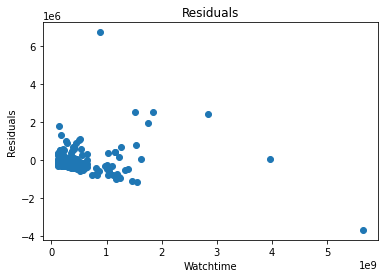

In [364]:
residuals = []
#collect residuals - predicted follower count subtracted from actual follower count
for i in range(250):
    predicted_count = y_test_lr[i]
    actual_count = y_test[i]
    residuals.append(actual_count - predicted_count)

#plot
watchtimes = np.asarray(X_test).flatten()
plt.scatter(X_test, residuals)
plt.xlabel("Watchtime")
plt.ylabel("Residuals")
plt.title("Residuals")
plt.show()

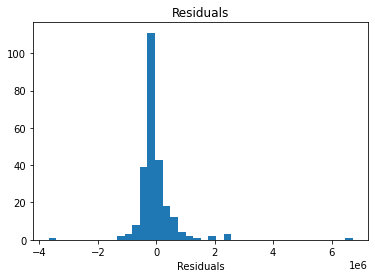

In [365]:
#histogram
plt.hist(residuals, bins=40)
plt.xlabel("Residuals")
plt.title("Residuals")
plt.show()

From the above plots, we gather two things: that the residuals roughly follows a uniform normal distribution with a large peak. However, it is also visible that there are a few outliers with extremely high/low residuals, which is even more clear within the scatter plot. This suggests that there are specific streamers who fall significantly outside of what our model expects on both sides. One streamer with a watchtime of about 1,000,000 minutes was significantly under-predicted in follower count, whereas a streamer with a watchtime over 5,000,000 was signficantly over-predicted in follower count. That being said, based on our residual plots we cannot neither determine that the model underpredicts nor overpredicts follower count, but seems rather to be generally imprecise.

**Conclusion:**

At the beginning of this tutorial, we set out to analyze relationships between follower count, view count, and watchtime among top streamers. We predicted a strong linear relationship between existing follower count and accumulated followers, but this was shown to be inaccurate, suggesting that growth may be exponential rather than linear. Instead, we found that watchtime was the factor most closely correlated with follower count, followed by average/peak viewership. While it may seem intuitive that higher watchtimes suggest higher follow counts, our analysis showed that it may not actually be that simple: as there were several outliers with high watchtimes but low follow counts, or lower watchtimes but higher follow counts.

Ultimately, this suggests that trying to predict future follower count may be difficult, as while most streamers appear to follow a similar growth pattern, there are a handful of streamers that may experience periods of virality, and therefore grow massively in follower count in a short period of time, despite having lower existing follows/views/watchtime.

In future analysis, it may be worth considering the personal attributes of each of these streamers (i.e. race, sex, etc.) and including them as interaction terms in the model. Ultimately, our current simple linear regression model (described as simple due to only containing one predictor variable) is somewhat inaccurate because there are other factors interacting with our model. If we can include these factors into our model, this may improve the predictive power of our model.

You can learn more about interaction terms in multiple linear regression here:
https://www.medicine.mcgill.ca/epidemiology/joseph/courses/EPIB-621/interaction.pdf